<a href="https://colab.research.google.com/github/hoseok94/242_700-02739242-/blob/main/projectcurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 42.0/235.7 GB disk)


In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Copy yolov11n.pt from Google Drive to Colab (replace with actual path)
!cp /content/drive/MyDrive/currency/Datasets/yolo11n-seg.pt /content/yolo11n-seg.pt




# Change Directory to the folder in Google Drive
%cd /content/drive/MyDrive/currency/Datasets

Mounted at /content/drive
/content/drive/MyDrive/currency/Datasets


In [4]:
from ultralytics import YOLO
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")  # ถ้าถูกต้องควรแสดง "cuda"

# โหลดโมเดล
model = YOLO("/content/drive/MyDrive/currency/Datasets/yolo11n-seg.pt")  # ระบุพาธโมเดล

# เทรนโมเดล
train_results = model.train(
    data="/content/drive/MyDrive/currency/Datasets/data.yaml",  # พาธไปยังไฟล์ YAML
    epochs=200,
    imgsz=640,
    device='0',
    workers=0
)

Using device: cuda
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/currency/Datasets/yolo11n-seg.pt, data=/content/drive/MyDrive/currency/Datasets/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=0, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_t

100%|██████████| 755k/755k [00:00<00:00, 131MB/s]


Overriding model.yaml nc=80 with nc=26

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/currency/Datasets/train/labels.cache... 1985 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1985/1985 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/currency/Datasets/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to runs/segment/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200       3.3G      1.082      3.352      4.119      1.432          4        640: 100%|██████████| 125/125 [01:58<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:44<00:00, 14.69s/it]

                   all         75        263     0.0239      0.411     0.0455     0.0292     0.0194      0.331     0.0319     0.0188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200       3.9G      0.927      2.368      3.634      1.286          5        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         75        263      0.132       0.24      0.126     0.0894       0.12      0.207      0.109     0.0643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200       3.9G     0.9813       2.21      2.984      1.334          1        640: 100%|██████████| 125/125 [01:12<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         75        263      0.186      0.295      0.163      0.117      0.167       0.29      0.131     0.0828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200       3.9G     0.9264      2.055      2.518      1.285          9        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         75        263      0.195      0.309      0.202      0.151      0.181      0.264      0.179      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200       3.9G     0.8592      1.901      2.168      1.223          4        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         75        263      0.288      0.374      0.282      0.207      0.283      0.358      0.253      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200       3.9G     0.8325      1.808      1.953      1.194          4        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         75        263      0.304      0.426      0.327      0.267       0.28      0.394      0.296      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200       3.9G     0.7903      1.722       1.82      1.164          4        640: 100%|██████████| 125/125 [01:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         75        263      0.371       0.38      0.316      0.234      0.338       0.34      0.277      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200       3.9G     0.7632      1.659      1.623      1.137          4        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         75        263      0.358      0.444       0.37      0.293      0.349      0.426      0.351      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200       3.9G     0.7492       1.65      1.535      1.128          3        640: 100%|██████████| 125/125 [01:12<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         75        263      0.367      0.425      0.379      0.288      0.348       0.39      0.337      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200       3.9G     0.7241       1.57       1.43      1.108          5        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all         75        263      0.371      0.489       0.42      0.313      0.363      0.467      0.399       0.26

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200       3.9G      0.732      1.577      1.372       1.13          1        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all         75        263      0.494      0.455      0.465      0.379      0.465      0.428      0.438      0.309

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200       3.9G     0.6826       1.46       1.26      1.083         23        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         75        263      0.391      0.424       0.42      0.324       0.37      0.379      0.377      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200       3.9G     0.6705      1.438      1.216      1.072          5        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


                   all         75        263      0.398      0.546      0.428      0.323      0.367      0.514      0.387      0.251

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200       3.9G     0.6683      1.417      1.161       1.07          6        640: 100%|██████████| 125/125 [01:12<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         75        263      0.521      0.514      0.523      0.425      0.505      0.482      0.491      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200       3.9G      0.665      1.377      1.111      1.071          8        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         75        263      0.489      0.466      0.454      0.363      0.503      0.398      0.407       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200       3.9G     0.6414      1.378      1.064      1.062          8        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         75        263      0.387      0.538      0.456      0.366      0.375      0.513      0.437      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200       3.9G     0.6476      1.358      1.067      1.058          2        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         75        263      0.402      0.414      0.398      0.312      0.406      0.406      0.389      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200       3.9G     0.6316      1.347      1.008      1.047          5        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         75        263      0.479      0.438      0.426      0.338      0.457      0.416      0.388      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200       3.9G     0.6293      1.294      0.974       1.05          7        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         75        263      0.446      0.475      0.479      0.385      0.445      0.439      0.445      0.318



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200       3.9G     0.6137       1.27      0.957      1.043         13        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         75        263      0.526      0.381      0.462      0.357      0.519      0.373      0.435      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200       3.9G     0.6099      1.269     0.9382      1.033          5        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         75        263      0.392      0.538      0.477      0.372       0.46       0.41      0.436      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200       3.9G     0.6007      1.233     0.8921      1.028          5        640: 100%|██████████| 125/125 [01:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         75        263      0.465      0.455       0.48       0.38      0.376      0.441      0.446        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200       3.9G     0.5854       1.21     0.8597      1.018         11        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         75        263      0.396      0.405      0.416       0.32      0.398       0.36       0.39      0.265



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200       3.9G      0.589       1.22     0.8513      1.024          4        640: 100%|██████████| 125/125 [01:14<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         75        263      0.385      0.498      0.426      0.325      0.359      0.456      0.396      0.254



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200       3.9G     0.5783      1.193     0.8377      1.017         10        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         75        263      0.386      0.449       0.42      0.328       0.48      0.412       0.39      0.258

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200       3.9G     0.5738      1.166     0.8403      1.011          4        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


                   all         75        263       0.45      0.515      0.509      0.412      0.444      0.515      0.489      0.349

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200       3.9G      0.576      1.164     0.8216      1.015          3        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


                   all         75        263      0.534      0.518      0.505      0.409      0.495      0.477      0.454      0.323

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200       3.9G     0.5673      1.173     0.8086      1.014          3        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         75        263      0.498      0.382      0.438      0.338      0.491      0.388      0.424      0.277

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200       3.9G     0.5645      1.133     0.7776      1.006          8        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


                   all         75        263      0.433      0.524      0.467      0.364      0.482      0.414      0.447      0.293

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200       3.9G     0.5503      1.083     0.7363     0.9957          8        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         75        263      0.523       0.45      0.486      0.385      0.596      0.406      0.454      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200       3.9G     0.5593      1.134     0.7672      1.007         10        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


                   all         75        263      0.795      0.346      0.507      0.416      0.781      0.344       0.48      0.343

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200       3.9G     0.5541      1.137     0.7441      1.001          7        640: 100%|██████████| 125/125 [01:12<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         75        263      0.399       0.56      0.518      0.413      0.377      0.526      0.475      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200       3.9G     0.5404      1.093     0.7288     0.9946          6        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         75        263      0.401      0.489      0.474      0.383      0.479       0.44       0.46      0.319

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200       3.9G     0.5495      1.118     0.7319     0.9998          9        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         75        263      0.619      0.356      0.419      0.339      0.627      0.356      0.404      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200       3.9G     0.5425      1.103     0.7161      1.001          6        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all         75        263      0.413      0.483      0.505      0.388      0.412      0.437      0.469      0.324

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200       3.9G     0.5301      1.063      0.691     0.9902          7        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


                   all         75        263      0.481      0.471      0.436      0.344      0.471      0.454      0.406      0.274

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200       3.9G     0.5295      1.052     0.6918     0.9885         11        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


                   all         75        263      0.536      0.434      0.474       0.38      0.529      0.406      0.442      0.287

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200       3.9G     0.5244      1.048     0.6757     0.9876         10        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         75        263      0.556      0.389      0.452      0.363      0.548      0.385       0.43        0.3

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200       3.9G     0.5201      1.025      0.664     0.9881          4        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         75        263      0.525      0.448      0.475      0.379      0.527      0.447      0.445      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200       3.9G     0.5082      1.016      0.659     0.9777          7        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         75        263      0.559      0.406      0.496      0.398      0.549      0.399      0.466      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200       3.9G     0.5321      1.056       0.68     0.9991          4        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         75        263      0.434      0.514      0.493      0.394      0.422      0.503      0.467      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200       3.9G     0.5133      1.015     0.6413     0.9777          5        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         75        263      0.514      0.489      0.502      0.423      0.515      0.485      0.488      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200       3.9G      0.523      1.019     0.6385     0.9829          6        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         75        263      0.457      0.442      0.444      0.366      0.456      0.436      0.428      0.301

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200       3.9G     0.5051     0.9808     0.6431     0.9776         11        640: 100%|██████████| 125/125 [01:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         75        263      0.545       0.44       0.49      0.394      0.552      0.429      0.455      0.322

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200       3.9G     0.5004     0.9787     0.6186     0.9769          8        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


                   all         75        263      0.529      0.442      0.451      0.363       0.53      0.432      0.424      0.296

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200       3.9G     0.5062      0.972     0.6075     0.9766          8        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         75        263      0.584      0.474      0.518      0.441      0.578      0.462      0.506      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200       3.9G     0.5169      1.042     0.6365     0.9945          3        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         75        263      0.477       0.54      0.545      0.458      0.472       0.53      0.532       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200       3.9G      0.504     0.9742     0.6048     0.9754         11        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         75        263      0.514      0.457      0.499      0.387      0.493      0.477      0.463      0.312

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200       3.9G     0.4902     0.9536     0.6043     0.9758          5        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


                   all         75        263      0.402      0.487      0.455      0.385      0.364      0.474      0.436       0.31

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200       3.9G     0.5022     0.9547     0.6179     0.9793          4        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


                   all         75        263      0.548       0.48      0.502      0.412      0.515      0.453      0.464       0.34

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200       3.9G     0.4956     0.9856     0.5951     0.9704         10        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         75        263      0.575      0.426      0.468       0.38      0.547      0.405      0.436      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200       3.9G     0.4766     0.9273     0.5774     0.9678          7        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


                   all         75        263       0.46      0.505      0.513       0.43      0.598      0.377      0.474      0.358

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200       3.9G     0.4876     0.9427     0.5813      0.972          3        640: 100%|██████████| 125/125 [01:15<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         75        263      0.419      0.479      0.446      0.365       0.43      0.469      0.435        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200       3.9G     0.4696     0.9041     0.5598     0.9603          8        640: 100%|██████████| 125/125 [01:15<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         75        263      0.599      0.417      0.487      0.406      0.569      0.395       0.44      0.327

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200       3.9G      0.479     0.9801     0.5701     0.9662          4        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         75        263      0.487      0.451      0.486      0.401      0.476      0.434       0.46      0.329

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200       3.9G     0.4743     0.9083     0.5619     0.9659         12        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         75        263      0.716      0.396      0.532      0.451      0.716      0.396      0.512       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200       3.9G      0.474     0.9234     0.5606     0.9632          6        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         75        263      0.441      0.494      0.478       0.38      0.431       0.48      0.457      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200       3.9G     0.4685     0.8899     0.5539     0.9601          5        640: 100%|██████████| 125/125 [01:14<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


                   all         75        263      0.524      0.481      0.508      0.423      0.496      0.458      0.472      0.344

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200       3.9G     0.4638     0.9115      0.554     0.9581         11        640: 100%|██████████| 125/125 [01:14<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


                   all         75        263      0.495      0.493      0.489      0.402      0.467      0.468      0.449       0.32

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200       3.9G     0.4842     0.9369     0.5663     0.9707          5        640: 100%|██████████| 125/125 [01:14<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


                   all         75        263      0.533      0.471      0.513       0.42       0.51      0.461      0.479      0.351

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200       3.9G     0.4637     0.8978      0.539     0.9587          6        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         75        263      0.533      0.467      0.525      0.436      0.627      0.391      0.499      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200       3.9G     0.4659     0.8813     0.5401     0.9577          4        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         75        263      0.625      0.395       0.49      0.394       0.61      0.391      0.455      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200       3.9G     0.4734     0.8877     0.5498     0.9653         18        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


                   all         75        263      0.626      0.438      0.515      0.417      0.616      0.425      0.481      0.336

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200       3.9G     0.4678     0.8701     0.5335     0.9593          5        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all         75        263      0.509      0.469      0.473      0.388       0.49      0.451      0.437      0.314

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200       3.9G     0.4736     0.9153     0.5465     0.9619          2        640: 100%|██████████| 125/125 [01:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         75        263      0.515      0.448      0.457      0.378        0.5      0.432      0.432      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200       3.9G      0.446     0.8697     0.5214     0.9505         12        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]


                   all         75        263      0.435      0.482      0.464      0.387      0.427       0.47      0.434      0.309

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200       3.9G     0.4609      0.878     0.5165     0.9571          8        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all         75        263      0.521      0.462      0.498      0.408       0.51      0.449      0.471      0.346

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200       3.9G     0.4501     0.8543     0.5106      0.955         10        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


                   all         75        263      0.444      0.461      0.485      0.397      0.438      0.452      0.458      0.326

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200       3.9G     0.4551     0.8526     0.5106     0.9557         10        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         75        263      0.468      0.469      0.479        0.4      0.402      0.483      0.454      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200       3.9G     0.4592       0.87     0.5184     0.9625          1        640: 100%|██████████| 125/125 [01:14<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         75        263      0.641      0.356      0.482        0.4       0.63      0.351      0.456      0.336

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200       3.9G     0.4581     0.8752     0.5396     0.9518         11        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         75        263      0.641      0.439      0.512      0.433      0.629      0.426      0.474      0.357

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200       3.9G     0.4545     0.8613     0.5115      0.956         17        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         75        263      0.511      0.475      0.463      0.375      0.551      0.418      0.434      0.302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200       3.9G     0.4378     0.8149      0.492     0.9487          2        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all         75        263        0.7      0.412      0.531      0.429      0.685      0.402      0.505      0.363

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200       3.9G     0.4438     0.8196     0.4881     0.9512          6        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


                   all         75        263      0.455      0.539      0.506       0.41       0.42      0.504      0.466       0.33

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200       3.9G     0.4377     0.8473     0.4891      0.947          6        640: 100%|██████████| 125/125 [01:12<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         75        263      0.548      0.427      0.477      0.386      0.533      0.409      0.438      0.318

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200       3.9G     0.4446     0.8436     0.4985     0.9529          3        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


                   all         75        263      0.556      0.484      0.509      0.424      0.536      0.464      0.477      0.349

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200       3.9G     0.4438      0.865     0.5114     0.9515          2        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         75        263      0.466      0.518      0.503      0.426      0.444      0.501      0.474       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200       3.9G     0.4433     0.8394     0.4835     0.9489         10        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         75        263      0.553       0.46      0.532      0.447      0.534      0.444      0.495      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200       3.9G      0.437     0.8331     0.4911     0.9487          4        640: 100%|██████████| 125/125 [01:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


                   all         75        263      0.632        0.4      0.512       0.43      0.641      0.388      0.486      0.365

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200       3.9G     0.4377     0.8172      0.482     0.9483         22        640: 100%|██████████| 125/125 [01:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         75        263       0.52      0.495       0.52      0.428      0.531      0.444      0.492      0.351

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200       3.9G     0.4396       0.82     0.4915     0.9501         14        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


                   all         75        263      0.453      0.457      0.527       0.45      0.434      0.438      0.504      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200       3.9G     0.4338     0.8058     0.4722     0.9443         11        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         75        263      0.517      0.474       0.51      0.416      0.499      0.457      0.476      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200       3.9G     0.4309     0.8209     0.4753     0.9436         13        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


                   all         75        263      0.503      0.466      0.491      0.415      0.501      0.432       0.46      0.347

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200       3.9G     0.4302     0.8005     0.4624     0.9428         10        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all         75        263      0.513      0.503      0.481      0.388      0.497      0.485      0.441      0.312

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200       3.9G     0.4335     0.8103     0.4701     0.9444          9        640: 100%|██████████| 125/125 [01:12<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         75        263      0.657      0.414      0.527      0.443      0.663      0.393      0.495      0.365

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200       3.9G     0.4225      0.802     0.4631     0.9377         11        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


                   all         75        263      0.483      0.462      0.503      0.422      0.469      0.457      0.477      0.348

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200       3.9G     0.4237     0.8074     0.4758     0.9452          8        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         75        263      0.466      0.523      0.538      0.455      0.579      0.401      0.494      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200       3.9G     0.4365     0.8037     0.4887     0.9512          1        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         75        263        0.5      0.463      0.544      0.455      0.489      0.452      0.515       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200       3.9G     0.4298     0.7894     0.4757     0.9416          9        640: 100%|██████████| 125/125 [01:12<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         75        263       0.47      0.487      0.504      0.415      0.482      0.433      0.466      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200       3.9G     0.4192     0.8148     0.4569     0.9435          5        640: 100%|██████████| 125/125 [01:12<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all         75        263      0.539      0.506      0.521      0.444      0.514      0.482      0.493      0.373

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200       3.9G     0.4242     0.7915     0.4543     0.9401          9        640: 100%|██████████| 125/125 [01:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         75        263      0.413      0.529      0.473      0.398      0.397      0.505      0.448      0.329



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200       3.9G     0.4395     0.9231      0.465     0.9688          2        640: 100%|██████████| 125/125 [01:16<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         75        263      0.636      0.414      0.511      0.432      0.633      0.407       0.48      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200       3.9G     0.4124     0.7716     0.4368     0.9323          7        640: 100%|██████████| 125/125 [01:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         75        263      0.466      0.451      0.497      0.417       0.45      0.432      0.462      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200       3.9G     0.4179     0.7768     0.4418     0.9391          4        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         75        263      0.536      0.452      0.514      0.417      0.531      0.441      0.495      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200       3.9G     0.4229      0.763     0.4605     0.9412          8        640: 100%|██████████| 125/125 [01:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         75        263      0.573      0.413      0.481      0.392      0.505      0.429      0.454      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200       3.9G     0.4179     0.7877     0.4536      0.938          9        640: 100%|██████████| 125/125 [01:14<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         75        263      0.448      0.515      0.503      0.429      0.428      0.482       0.48      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200       3.9G     0.4161     0.7842     0.4537     0.9381          2        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


                   all         75        263      0.533      0.479      0.548      0.455      0.517      0.463      0.516      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200       3.9G     0.4229     0.7659     0.4535     0.9408         26        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


                   all         75        263      0.542      0.485      0.531      0.438      0.543      0.473        0.5      0.365

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200       3.9G     0.4111     0.7539     0.4453     0.9333          5        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all         75        263      0.474      0.546       0.51      0.418      0.467      0.523      0.479      0.343

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200       3.9G     0.4105     0.7567      0.424     0.9338          6        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


                   all         75        263      0.436      0.507      0.482      0.397      0.416      0.482      0.454      0.334

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200       3.9G     0.4145     0.7632     0.4495     0.9395          6        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         75        263      0.449      0.494      0.515      0.432      0.441      0.475      0.494      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200       3.9G     0.4162     0.7817     0.4556     0.9363          4        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         75        263      0.538       0.49       0.49      0.407      0.527      0.477      0.463      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200       3.9G     0.4085     0.7473     0.4368       0.93         23        640: 100%|██████████| 125/125 [01:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         75        263      0.512      0.472      0.503      0.423      0.523      0.435      0.473      0.352

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200       3.9G     0.4141     0.7703     0.4366     0.9391          3        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         75        263      0.527       0.43      0.518      0.439      0.513       0.42      0.496      0.359

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200       3.9G     0.4031     0.7301     0.4358     0.9332          2        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         75        263      0.494      0.503      0.489      0.406      0.466      0.494      0.461      0.335



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200       3.9G     0.3991     0.7209      0.427       0.93          6        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         75        263      0.425      0.473      0.466      0.378      0.458      0.453      0.438       0.31

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200       3.9G     0.3984     0.7139     0.4136     0.9283         12        640: 100%|██████████| 125/125 [01:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         75        263      0.519      0.505      0.503      0.412      0.502      0.488      0.471      0.339



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200       3.9G      0.408     0.7329     0.4158     0.9311          7        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         75        263      0.596      0.426      0.525      0.431      0.591      0.421      0.495      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200       3.9G     0.3996     0.7425     0.4138     0.9294         13        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         75        263      0.505      0.415      0.508      0.423      0.489      0.403      0.471       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200       3.9G     0.4025     0.7462     0.4384     0.9334         16        640: 100%|██████████| 125/125 [01:12<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         75        263      0.488      0.473      0.489      0.395      0.485      0.468      0.466      0.337

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200       3.9G     0.4025     0.7358     0.4217     0.9349         12        640: 100%|██████████| 125/125 [01:12<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         75        263      0.494      0.462      0.518      0.416      0.513      0.439      0.485      0.349

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200       3.9G     0.3948     0.7313     0.4241     0.9291          5        640: 100%|██████████| 125/125 [01:10<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


                   all         75        263       0.48      0.496      0.494      0.407      0.467       0.48      0.464      0.345

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200       3.9G     0.3976     0.7131     0.4019     0.9286         14        640: 100%|██████████| 125/125 [01:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]


                   all         75        263       0.56      0.441      0.513      0.434      0.643      0.378      0.491       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200       3.9G     0.3851     0.7084     0.3961     0.9235          8        640: 100%|██████████| 125/125 [01:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         75        263      0.641      0.399      0.512      0.429      0.659      0.386      0.491      0.361

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200       3.9G     0.3911     0.7204     0.4077     0.9245         12        640: 100%|██████████| 125/125 [01:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         75        263      0.466      0.525      0.542      0.451      0.657      0.403      0.513      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200       3.9G     0.3906     0.7065     0.4004     0.9237         12        640: 100%|██████████| 125/125 [01:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


                   all         75        263       0.46      0.521      0.535      0.446      0.721      0.363      0.514      0.385

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200       3.9G     0.3839     0.6991      0.403      0.925         11        640: 100%|██████████| 125/125 [01:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]


                   all         75        263      0.416      0.505      0.522      0.438      0.405      0.489      0.491       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200       3.9G     0.3895     0.7037      0.397     0.9242          8        640: 100%|██████████| 125/125 [01:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


                   all         75        263      0.459      0.488      0.524      0.437      0.448      0.471      0.488      0.367

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200       3.9G     0.3865     0.7004     0.3964     0.9253          4        640: 100%|██████████| 125/125 [01:10<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         75        263      0.633      0.399      0.521      0.434      0.611       0.39      0.488      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200       3.9G     0.3778     0.6778     0.3812     0.9193          5        640: 100%|██████████| 125/125 [01:11<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         75        263      0.546      0.432      0.514      0.429      0.715      0.349      0.486      0.367

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200       3.9G     0.3858     0.6919     0.3882     0.9231          9        640: 100%|██████████| 125/125 [01:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]


                   all         75        263       0.54       0.46      0.527      0.435      0.525      0.446      0.504      0.368

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200       3.9G     0.3884     0.7326     0.3908     0.9278          3        640: 100%|██████████| 125/125 [01:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]


                   all         75        263      0.486      0.514      0.533      0.438      0.476      0.504      0.507      0.374

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200       3.9G     0.3804     0.6784     0.3804     0.9221          4        640: 100%|██████████| 125/125 [01:10<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         75        263      0.559      0.414      0.511      0.418      0.547      0.403      0.481      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200       3.9G     0.3748     0.6839     0.3825     0.9204          6        640: 100%|██████████| 125/125 [01:10<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]


                   all         75        263      0.678      0.386      0.529      0.439       0.64      0.381      0.492       0.36

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200       3.9G     0.3817     0.6877      0.389     0.9227          7        640: 100%|██████████| 125/125 [01:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


                   all         75        263      0.444      0.554      0.546      0.453      0.434      0.538      0.517      0.385

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200       3.9G      0.379      0.692     0.3876     0.9194          7        640: 100%|██████████| 125/125 [01:10<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]


                   all         75        263      0.485      0.518      0.548       0.46      0.471      0.501      0.524      0.379

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200       3.9G     0.3814     0.7047     0.3952     0.9187          6        640: 100%|██████████| 125/125 [01:11<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         75        263      0.461      0.516      0.522      0.429      0.448      0.504      0.491      0.359

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200       3.9G     0.3828     0.7004     0.3828      0.922          5        640: 100%|██████████| 125/125 [01:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         75        263      0.527      0.468      0.536      0.453       0.52      0.462       0.51      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200       3.9G     0.3809     0.6971     0.4006     0.9279          2        640: 100%|██████████| 125/125 [01:11<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]


                   all         75        263       0.47      0.526      0.538       0.44       0.45      0.509      0.512      0.369

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200       3.9G     0.3737     0.6867     0.4284     0.9211          1        640: 100%|██████████| 125/125 [01:17<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]


                   all         75        263      0.519      0.515      0.546      0.457      0.512        0.5      0.514      0.379

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200       3.9G     0.3912     0.7602     0.4263     0.9374          7        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         75        263      0.511      0.454      0.518      0.434      0.498      0.437      0.489      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200       3.9G     0.3774      0.684     0.3855     0.9195          5        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         75        263      0.557      0.413      0.503      0.431      0.552      0.397      0.478      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200       3.9G     0.3778     0.6793     0.3792     0.9193         12        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all         75        263      0.453      0.481       0.51      0.424       0.46       0.46      0.484      0.358

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200       3.9G      0.379     0.6752     0.3775     0.9229          3        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all         75        263      0.552      0.419      0.506      0.416      0.536      0.403      0.474      0.349

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200       3.9G     0.3773     0.6733     0.3788     0.9189         10        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]


                   all         75        263      0.532      0.434      0.514      0.428      0.521       0.42      0.481      0.352

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200       3.9G     0.3847     0.6949     0.3977     0.9362          5        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         75        263      0.496      0.466      0.515      0.428       0.47      0.443      0.473       0.36

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200       3.9G     0.3714     0.6574     0.3691     0.9165          5        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


                   all         75        263      0.514      0.441      0.512      0.427        0.5      0.431      0.491      0.369

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200       3.9G     0.3725     0.6743     0.3806      0.919         10        640: 100%|██████████| 125/125 [01:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]


                   all         75        263      0.442      0.508       0.53      0.445      0.538      0.436       0.51       0.38

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200       3.9G     0.3715      0.653     0.3753     0.9179         10        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]


                   all         75        263      0.442      0.467      0.516      0.439      0.594      0.393      0.496      0.374

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200       3.9G     0.3776     0.6863     0.3805     0.9239          7        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         75        263      0.503       0.49      0.527      0.445      0.493      0.479      0.505      0.379

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200       3.9G     0.3752     0.7037     0.4119      0.923          1        640: 100%|██████████| 125/125 [01:13<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         75        263      0.471      0.508      0.523      0.437      0.468      0.502      0.503      0.366

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200       3.9G     0.3669     0.6465     0.3607     0.9148          5        640: 100%|██████████| 125/125 [01:14<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         75        263      0.482      0.421      0.488       0.41      0.467      0.408      0.462      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200       3.9G     0.3635     0.6637     0.3628     0.9159          8        640: 100%|██████████| 125/125 [01:14<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         75        263       0.48      0.494      0.514       0.43      0.471      0.478      0.487      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200       3.9G      0.364     0.6599     0.3624     0.9148          5        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all         75        263      0.504      0.488      0.546      0.454      0.483      0.464      0.512      0.381

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200       3.9G     0.3627     0.6509     0.3578     0.9113          7        640: 100%|██████████| 125/125 [01:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]


                   all         75        263       0.51      0.515      0.541      0.455       0.49      0.493       0.51      0.385

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200       3.9G     0.3712      0.672      0.374     0.9184          5        640: 100%|██████████| 125/125 [01:15<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]


                   all         75        263      0.518      0.517      0.532       0.44       0.51      0.505      0.508       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200       3.9G     0.3556     0.6267     0.3497     0.9127          8        640: 100%|██████████| 125/125 [01:14<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         75        263      0.518      0.484      0.533      0.439      0.503      0.463      0.504      0.359
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 47, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



147 epochs completed in 3.086 hours.
Optimizer stripped from runs/segment/train6/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train6/weights/best.pt, 6.0MB

Validating runs/segment/train6/weights/best.pt...
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,839,638 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]


                   all         75        263      0.478      0.538      0.546      0.458      0.473       0.53      0.532       0.39
     banknote_10000JPY         11         25      0.432      0.609      0.533       0.43      0.435      0.615      0.526      0.301
      banknote_1000JPY          9         25      0.427       0.36      0.402      0.297      0.421       0.36      0.387      0.177
      banknote_1000THB          9         27      0.454      0.444      0.329      0.261      0.452      0.444      0.328      0.227
       banknote_100CNY          8         16      0.532      0.312      0.354       0.29       0.53      0.312      0.358      0.314
       banknote_100THB          8         16       0.42      0.188      0.261      0.197      0.416      0.188      0.254      0.204
       banknote_100USD         15         66      0.572       0.53      0.517      0.366      0.586      0.545      0.496      0.257
        banknote_10CNY          6          7      0.854      0.571   

In [2]:
!ls /content/drive/MyDrive/currency/Datasets/

data.yaml	    README.roboflow.txt  test	valid	    yolo11n-seg.pt
README.dataset.txt  runs		 train	yolo11n.pt


Using device: cuda

image 1/1 /content/drive/MyDrive/currency/Datasets/test/001.jpg: 288x640 1 banknote_1USD, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 288, 640)
Class: banknote_1USD, Confidence: 39.79%
จำนวนเงินรวมในภาพคือ: 33.45 บาท


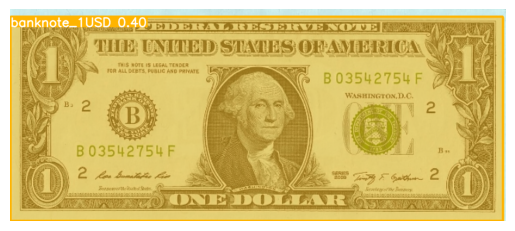

In [26]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch


#อัปเดตอัตราแลกเปลี่ยน (ณ วันที่ 13 มีนาคม 2568 จากไฟล์ของคุณ)
exchange_rates = {
    "JPY_to_THB": 21.785 / 100,  # เยน (ต่อ 1 เยน) เป็นบาท
    "USD_to_THB": 33.4491,       # ดอลลาร์สหรัฐเป็นบาท
    "CNY_to_THB": 4.546,         # หยวนเป็นบาท
    "GBP_to_THB": 41.9005,       # ปอนด์สเตอร์ลิงเป็นบาท
    "THB_to_THB": 1              # บาทยังคงเป็นบาท
}
# ตรวจสอบการใช้งาน GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# ชี้พาธไฟล์โมเดลให้ถูกต้อง
model = YOLO("/content/drive/MyDrive/currency/Datasets/runs/segment/train4/weights/best.pt")

# พาธรูปภาพที่ต้องการตรวจจับ
image_path = "/content/drive/MyDrive/currency/Datasets/test/001.jpg"

# ทำการตรวจจับ
results = model(image_path, conf=0.3)

#ตัวแปรสะสมมูลค่าเงินรวม (เงินบาท)
total_amount_THB = 0

#ดิกชันนารีจับคู่ธนบัตรกับมูลค่า
class_values = {
    "banknote_10000JPY": 10000,
    "banknote_1000JPY": 1000,
    "banknote_1000THB": 1000,
    "banknote_100CNY": 100,
    "banknote_100THB": 100,
    "banknote_100USD": 100,
    "banknote_10CNY": 10,
    "banknote_10GBP": 10,
    "banknote_10USD": 10,
    "banknote_1CNY": 1,
    "banknote_1USD": 1,
    "banknote_2000JPY": 2000,
    "banknote_20CNY": 20,
    "banknote_20GBP": 20,
    "banknote_20THB": 20,
    "banknote_20USD": 20,
    "banknote_2USD": 2,
    "banknote_5000JPY": 5000,
    "banknote_500THB": 500,
    "banknote_50CNY": 50,
    "banknote_50GBP": 50,
    "banknote_50THB": 50,
    "banknote_50USD": 50,
    "banknote_5CNY": 5,
    "banknote_5GBP": 5,
    "banknote_5USD": 5
}

#วนลูปตรวจจับธนบัตรในภาพ
confidence_threshold = 0.3  # กำหนดขั้นต่ำ 50%
for box in results[0].boxes:
    cls_id = int(box.cls)  # ดึง ID ของคลาส
    class_name = model.names[cls_id]  # ดึงชื่อคลาสจาก ID
    confidence = box.conf.item()
    cp =confidence*100
    print(f"Class: {class_name}, Confidence: {cp:.2f}%")

    # ตรวจสอบว่าธนบัตรอยู่ในสกุลใด และแปลงมูลค่าเป็นบาท
if confidence > confidence_threshold:  # กรองเฉพาะวัตถุที่มั่นใจมากกว่า 50%
    if "JPY" in class_name:
        total_amount_THB += class_values.get(class_name, 0) * exchange_rates["JPY_to_THB"]
    elif "USD" in class_name:
        total_amount_THB += class_values.get(class_name, 0) * exchange_rates["USD_to_THB"]
    elif "CNY" in class_name:
        total_amount_THB += class_values.get(class_name, 0) * exchange_rates["CNY_to_THB"]
    elif "GBP" in class_name:
        total_amount_THB += class_values.get(class_name, 0) * exchange_rates["GBP_to_THB"]
    elif "THB" in class_name:
        total_amount_THB += class_values.get(class_name, 0)
#แสดงผลรวมของมูลค่าเงิน
print(f"จำนวนเงินรวมในภาพคือ: {total_amount_THB:.2f} บาท")
#แสดงภาพผลลัพธ์พร้อมกรอบที่ตรวจจับ
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()


In [11]:
print(f"Class Name: {class_name}, Value: {class_values.get(class_name, 0)}, Exchange Rate: {exchange_rates['USD_to_THB']}")
print(f"Current Total (THB): {total_amount_THB}")


Class Name: banknote_100USD, Value: 100, Exchange Rate: 33.4491
Current Total (THB): 3378.3591
